In [4]:
import pandas as pd 
#upload files 
train= pd.read_csv('C:/Users/ignac/OneDrive/Escritorio/ejercicio simple/tabular-playground-series-apr-2021/train.csv')
test= pd.read_csv('C:/Users/ignac/OneDrive/Escritorio/ejercicio simple/tabular-playground-series-apr-2021/test.csv')
sample_submission=pd.read_csv('C:/Users/ignac/OneDrive/Escritorio/ejercicio simple/tabular-playground-series-apr-2021/sample_submission.csv')

In [12]:
print("\nInformation of the Train Set:")
print(train.info())
print ("\nInformation of the Test Set:")
print (test.info())
print("\nInformation of the Sample_submission Set:")
print(sample_submission.info())


Information of the Train Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB
None

Information of the Test Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  --

In [15]:
# Missing values  
print("\nMissing Values in Train Set:")
print(train.isnull().sum())
print("\nMissing values in Test Set:")
print(test.isnull().sum())
print("\nMissing values in Sample_submission Set:")
print(sample_submission.isnull().sum())


Missing Values in Train Set:
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

Missing values in Test Set:
PassengerId        0
Pclass             0
Name               0
Sex                0
Age             3487
SibSp              0
Parch              0
Ticket          5181
Fare             133
Cabin          70831
Embarked         277
dtype: int64

Missing values in Sample_submission Set:
PassengerId    0
Survived       0
dtype: int64


In [17]:
print("Predict whether or not a passenger survived the sinking of the Synthanic (a much larger synthetic data set based on the real Titanic data set). For each row in the test set, you must predict a value of 0 or 1 for the destination.PasengerIdSurvived")

Predict whether or not a passenger survived the sinking of the Synthanic (a much larger synthetic data set based on the real Titanic data set). For each row in the test set, you must predict a value of 0 or 1 for the destination.PasengerIdSurvived


In [18]:
# Example of initial analysis
print("Distribution of Survival:\n", train['Survived'].value_counts(normalize=True))
print("Sex Distribution:\n", train['Sex'].value_counts())
print("Distribution by Class:\n", train['Pclass'].value_counts())

Distribution of Survival:
 Survived
0    0.57226
1    0.42774
Name: proportion, dtype: float64
Sex Distribution:
 Sex
male      56114
female    43886
Name: count, dtype: int64
Distribution by Class:
 Pclass
3    41006
1    30315
2    28679
Name: count, dtype: int64


In [19]:
# Imputation of Null Values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Fare'].fillna(train['Fare'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [20]:
# Coding of categorical variables
train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.73


In [22]:
# Preparation of the test set with indicator variables
test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
test['Age'].fillna(train['Age'].median(), inplace=True)
test['Fare'].fillna(train['Fare'].median(), inplace=True)

predictions = model.predict(test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)

In [25]:
# Calculate the percentage of surviving passengers
total_passengers = len(train)
survived_passengers = train['Survived'].sum()
survival_rate = (survived_passengers / total_passengers) * 100

print(f"Percentage of passengers who survived: {survival_rate:.2f}%")

Percentage of passengers who survived: 42.77%


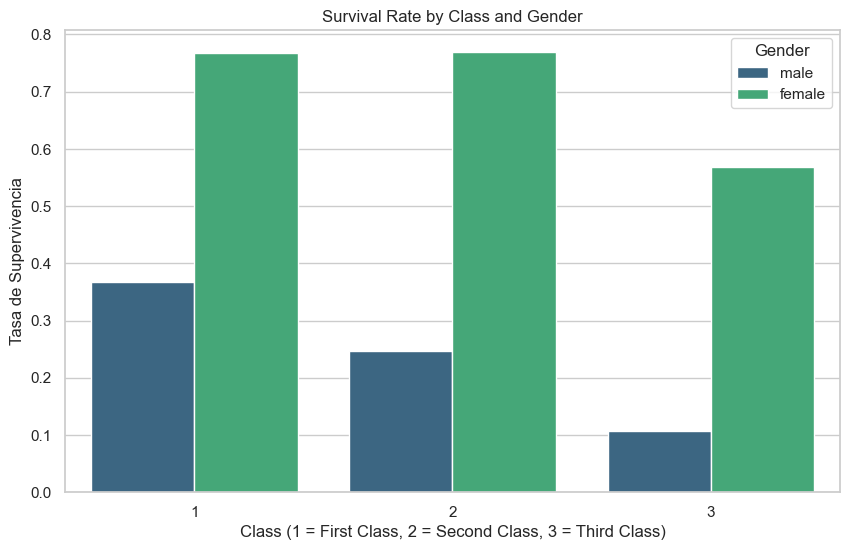

The survival rate for women in first class is 76.83%. This result suggests that women in first class have a higher probability of survival compared to other groups, possibly due to evacuation priorities and available resources.


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Cargar el conjunto de datos de entrenamiento
train = pd.read_csv('C:/Users/ignac/OneDrive/Escritorio/ejercicio simple/tabular-playground-series-apr-2021/train.csv')  

# Graph survival rate by class and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, errorbar=None, palette='viridis')
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Class (1 = First Class, 2 = Second Class, 3 = Third Class)')
plt.ylabel('Tasa de Supervivencia')
plt.legend(title='Gender')
plt.show()

# Calculate the survival rate for women in first class
first_class_women_survival_rate = train[(train['Pclass'] == 1) & (train['Sex'] == 'female')]['Survived'].mean()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


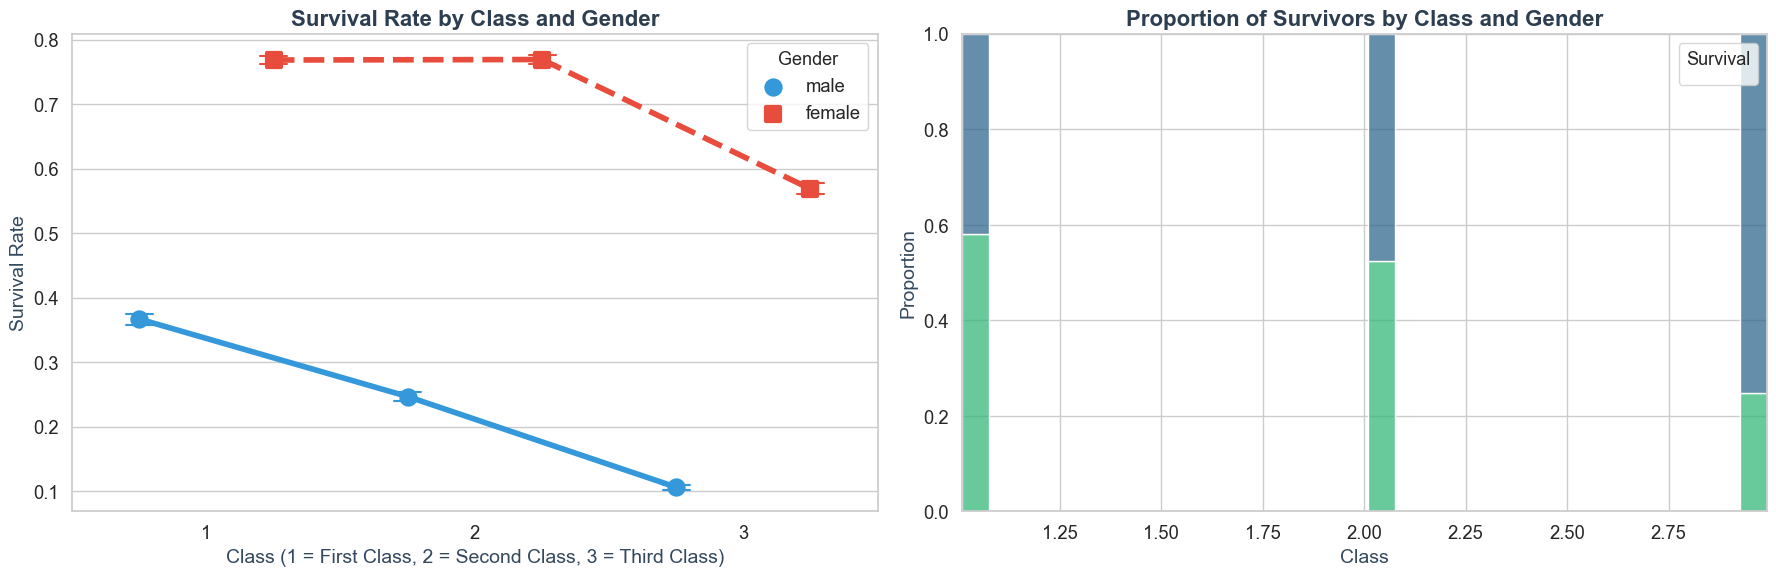

The survival rate for women in first class is 76.83%. This result suggests that women in first class have a higher probability of survival compared to other groups, possibly due to evacuation priorities and available resources.


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grafic
sns.set(style="whitegrid", font_scale=1.2)

# two subgraphs
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

#Point Plot to show trend in survival rates
sns.pointplot(
    x='Pclass', y='Survived', hue='Sex', data=train,
    palette={"male": "#3498db", "female": "#e74c3c"}, dodge=0.5, markers=["o", "s"],
    linestyles=["-", "--"], scale=1.5, errwidth=1.5, capsize=0.1, ax=axes[0]
)
axes[0].set_title('Survival Rate by Class and Gender', fontsize=16, fontweight='bold', color='#2c3e50')
axes[0].set_xlabel('Class (1 = First Class, 2 = Second Class, 3 = Third Class)', fontsize=14, color='#34495e')
axes[0].set_ylabel('Survival Rate', fontsize=14, color='#34495e')
axes[0].legend(title='Gender', title_fontsize='13', loc='upper right')

# Stacked bar chart to show survival proportion in each class and genus
sns.histplot(
    data=train, x="Pclass", hue="Survived", multiple="fill", palette="viridis", shrink=0.8, ax=axes[1]
)
axes[1].set_title("Proportion of Survivors by Class and Gender", fontsize=16, fontweight='bold', color='#2c3e50')
axes[1].set_xlabel("Class", fontsize=14, color='#34495e')
axes[1].set_ylabel("Proportion", fontsize=14, color='#34495e')
axes[1].legend(title="Survival", title_fontsize='13', loc='upper right')


plt.tight_layout()
plt.show()
print(f"The survival rate for women in first class is {first_class_women_survival_rate * 100:.2f}%. "
      "This result suggests that women in first class have a higher probability of survival "
      "compared to other groups, possibly due to evacuation priorities and available resources.")
